In [1]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator

h2o.init()

### Train the model

In [2]:
from h2o.utils.shared_utils import _locate # private function. used to find files within h2o git project directory.

prostate_train = h2o.import_file(path=_locate("smalldata/logreg/prostate.csv"))
prostate_train["CAPSULE"] = prostate_train["CAPSULE"].asfactor()

ntrees = 100
learning_rate = 0.1
depth = 5
min_rows = 10
# Build H2O GBM classification model:
gbm = H2OGradientBoostingEstimator(ntrees=ntrees, learn_rate=learning_rate,
                                       max_depth=depth,
                                       min_rows=min_rows,
                                       distribution="bernoulli")
gbm.train(x=list(range(1, prostate_train.ncol)), y="CAPSULE", training_frame=prostate_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


### Variable importance

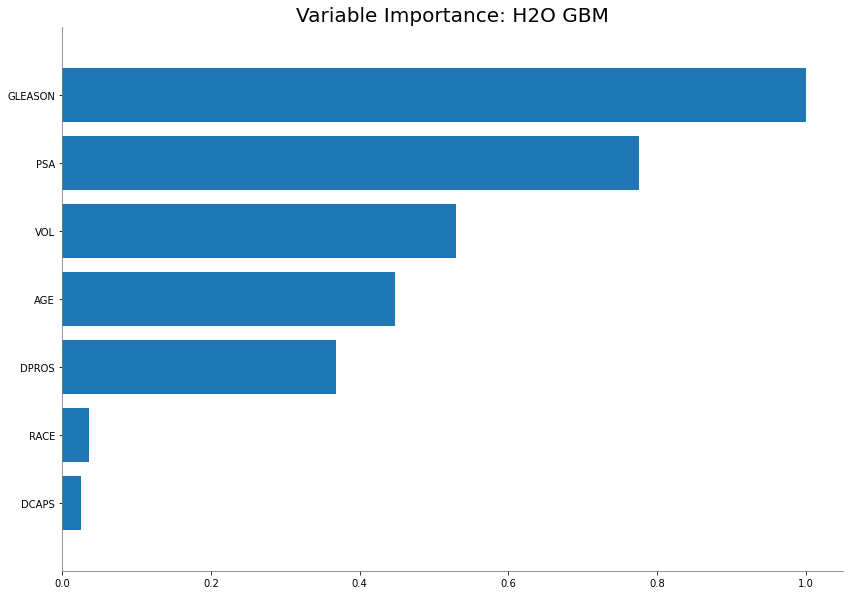

,variable,relative_importance,scaled_importance,percentage
0,GLEASON,113.942337,1.000000,0.314205
1,PSA,88.346039,0.775357,0.243621
2,VOL,60.350849,0.529661,0.166422
3,AGE,50.993736,0.447540,0.140619
4,DPROS,42.008102,0.368679,0.115841
5,RACE,4.168409,0.036583,0.011495
6,DCAPS,2.827885,0.024819,0.007798


In [3]:
gbm.varimp_plot()
gbm.varimp(use_pandas=True)

### Permutation Variable Importance

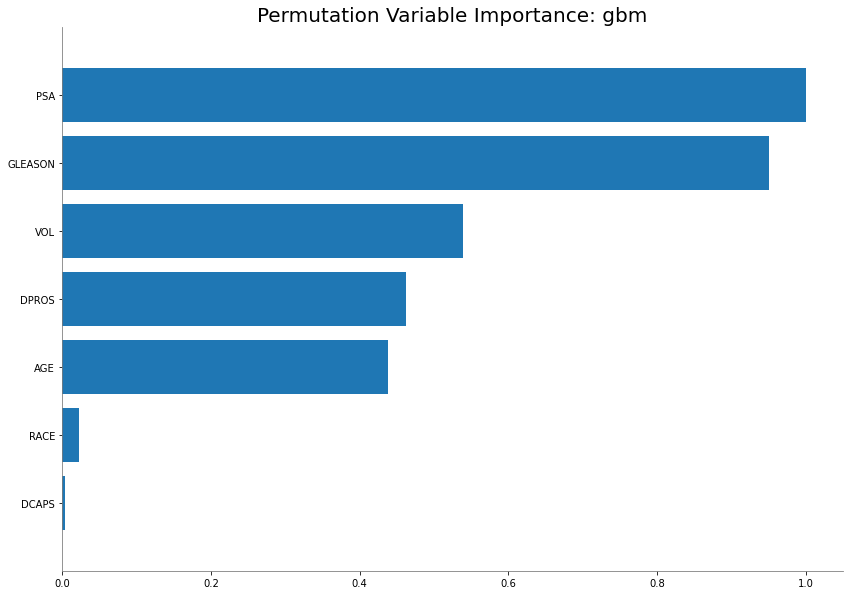


Variable Importances: 


,Variable,Relative Importance,Scaled Importance,Percentage
0,PSA,0.133771,1.000000,0.292864
1,GLEASON,0.127062,0.949849,0.278177
2,VOL,0.072039,0.538528,0.157716
3,DPROS,0.061919,0.462871,0.135558
4,AGE,0.058550,0.437688,0.128183
5,RACE,0.002966,0.022170,0.006493
6,DCAPS,0.000461,0.003444,0.001009


In [4]:
permutation_varimp = gbm.permutation_importance_plot(prostate_train)
permutation_varimp

#### How consistent is the permutation variable importance?
Let's look at 15 evaluations using the `n_repeats` parameter.

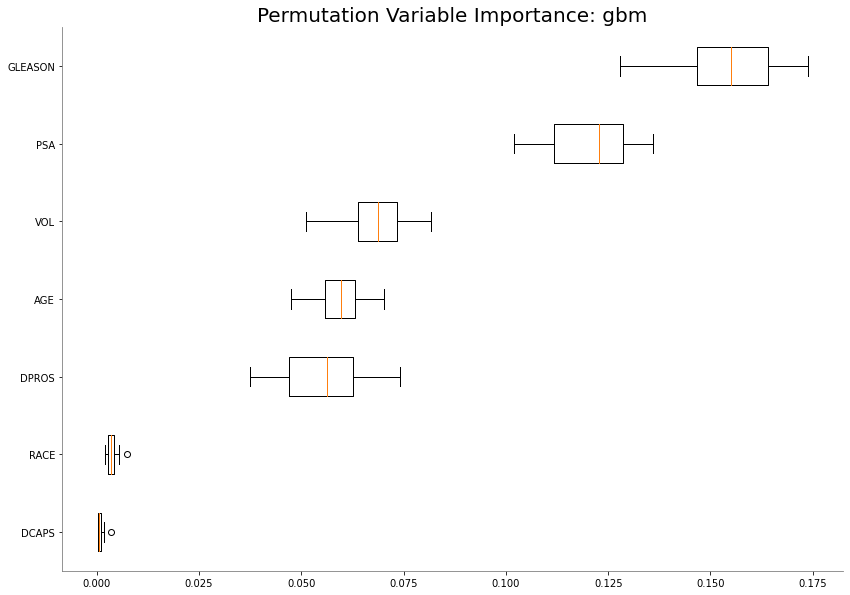

In [5]:
repeated_varimp = gbm.permutation_importance_plot(prostate_train, n_repeats=15)

In [6]:
repeated_varimp


Variable Importances: 


,Variable,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,Run 11,Run 12,Run 13,Run 14,Run 15
0,GLEASON,0.157179,0.153451,0.166163,0.154991,0.168250,0.165947,0.139213,0.150212,0.160836,0.173778,0.127782,0.162362,0.144755,0.148686,0.137456
1,PSA,0.113918,0.102675,0.130719,0.102157,0.110938,0.120814,0.127667,0.122686,0.102099,0.112335,0.130661,0.127149,0.129711,0.127278,0.135959
2,VOL,0.068469,0.071046,0.078143,0.070398,0.067346,0.065532,0.062221,0.073882,0.073047,0.052719,0.051078,0.081800,0.051798,0.076358,0.068815
3,AGE,0.064740,0.062394,0.064755,0.053396,0.059227,0.059774,0.063661,0.070312,0.047537,0.053670,0.058104,0.060018,0.061213,0.056535,0.055253
4,DPROS,0.038409,0.044830,0.062653,0.056290,0.058478,0.062711,0.049351,0.065590,0.040051,0.049898,0.037344,0.061386,0.074084,0.055052,0.063574
5,RACE,0.003887,0.002822,0.002332,0.002994,0.004261,0.002159,0.003081,0.003599,0.005384,0.003398,0.001900,0.002505,0.007285,0.004261,0.004578
6,DCAPS,0.001037,0.000288,0.001756,0.000749,0.003455,0.000317,0.000547,0.001238,0.000576,0.000374,0.000230,0.000806,0.001123,0.000547,0.000202


#### How much does it differ between different metrics?

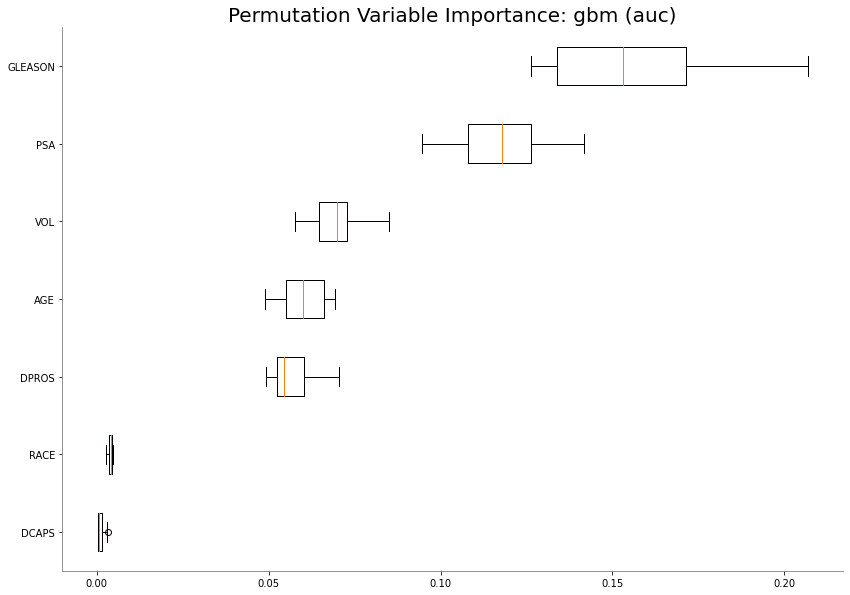

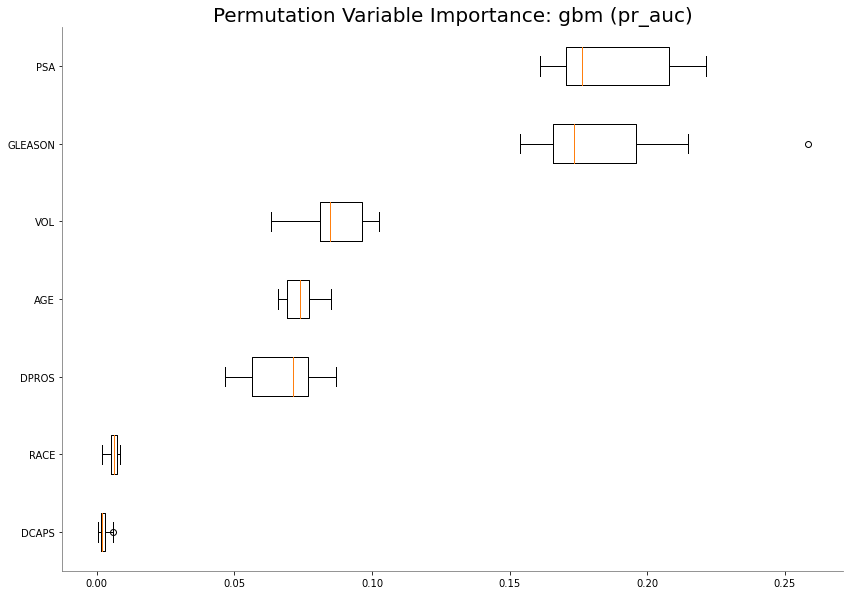

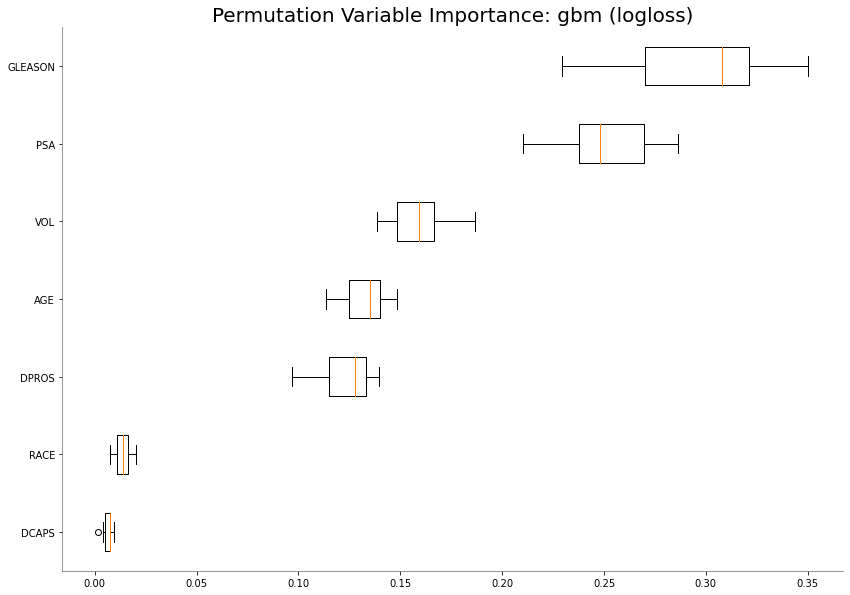

In [7]:
gbm.permutation_importance_plot(prostate_train, n_repeats=15, metric="auc")  # AUC is default metric for binary classification
gbm.permutation_importance_plot(prostate_train, n_repeats=15, metric="pr_auc")
gbm.permutation_importance_plot(prostate_train, n_repeats=15, metric="logloss");